 Throughout this project we are going to use AI to analyse geological datasets where we have 7 columns and 23611 entries 

 -  Columns are :
` 'Well', 'M.Depth', 'GR', 'NPHI', 'RHOB', 'RT'` as the features
 - , 'GE_Main' as the target column

In [ ]:
# Mouhamed MAMMAr

# Uploading Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as colors
###########
from sklearn.model_selection import train_test_split #for split the data
from sklearn.metrics import accuracy_score  #for accuracy_score
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.model_selection import GridSearchCV # Grid search cross validation
######################
import warnings
from warnings import simplefilter
# ignore all warnings
simplefilter(action='ignore')
############################################################
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.metrics import classification_report # for the report, precision scall,accuracy
# Import preprocsessing
from sklearn import preprocessing # Import preprocsessing
from xgboost.sklearn import XGBClassifier # XGBOOST classifier
import xgboost as xgb # XGBOOST
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.svm import SVC, LinearSVC # SVM
from sklearn.ensemble import RandomForestClassifier # Random Forests
from sklearn.linear_model import LogisticRegression # Logistic Regression
# creating initial dataframe
from sklearn.preprocessing import LabelEncoder


### Read The Data as a Dataframe

In [ ]:
data =pd.read_excel(r"C:\Users\dell\Downloads\i9999_logs_export_modified_10_wells.xlsm")
data1 = data.copy()

# Exploratory Data Anlysis, Feature Engineering

###

In [ ]:
data.head()

,Well,M.Depth,GR,NPHI,RHOB,RT,GE_Main
0,NaN,FT,GAPI,V/V,G/CC,OHMM,NaN
1,1.0,4010,84.694,0.50674,2.278,0.885,DO
2,1.0,4010.5,82.626,0.51526,2.252,0.875,DO
3,1.0,4011,80.79,0.51195,2.237,0.854,DO
4,1.0,4011.5,80.209,0.48551,2.225,0.83,DO


- The second row for each column represents unit of measure, which means we are able if we drop it that doesn't effect the results

In [ ]:
# Drop the first row (row of units)
data.drop(index=[0], inplace= True)
# data.head()

In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
data.columns

Index(['Well', 'M.Depth', 'GR', 'NPHI', 'RHOB', 'RT', 'GE_Main'], dtype='object')

In [ ]:
data.shape

(23610, 7)

- It can be seen that we have 223611 rows and 7 columns

In [ ]:
data.tail()

,Well,M.Depth,GR,NPHI,RHOB,RT,GE_Main
23606,10.0,5101.5,12.5831,0.27593,2.1986,0.2443,CH
23607,10.0,5102,18.0917,0.28037,2.2212,0.3015,CH
23608,10.0,5102.5,22.9285,0.28242,2.2481,0.3856,CH
23609,10.0,5103,26.6871,0.28514,2.2712,0.4729,CH
23610,10.0,5103.5,30.0862,0.29117,2.2831,0.5333,CH


**tail()** allows us to show the last 5 rows

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23610 entries, 1 to 23610
Data columns (total 7 columns):
Well       23610 non-null float64
M.Depth    23610 non-null object
GR         23610 non-null object
NPHI       23610 non-null object
RHOB       23610 non-null object
RT         23576 non-null object
GE_Main    23610 non-null object
dtypes: float64(1), object(6)
memory usage: 1.4+ MB


**info():**
It's like a magic function where we get informed more precisely about the Dataset, depending on the table above:
- We have 7 columns and 23611 rows with the index of 0 to 23610
- Data types here are :

- Well :                 float64
- M.Depth :              object
- GR       :             object
- NPHI      :            object
- RHOB       :           object
- RT          :          object
- GE_Main      :         object


### Detecting Missing Values

In [ ]:
data.isnull().sum()

Well        0
M.Depth     0
GR          0
NPHI        0
RHOB        0
RT         34
GE_Main     0
dtype: int64

As expected we have `34` values as Null values in the column of `RT`

In [ ]:
# Coverting The data types to Floats and integers
# When we received the data the most columns provided as objects, so we have to convert them to floats and integers
# The feature well it can be converted to int or objet because it is not a sensitive case when we want to predict the type of the GE_Main
data["Well"] = data["Well"].astype(int)
data["M.Depth"] = data["M.Depth"].astype(float)
data["GR"] = data.GR.astype(float)
data["NPHI"] = data.NPHI.astype(float)
data["RHOB"] = data.RHOB.astype(float)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23610 entries, 1 to 23610
Data columns (total 7 columns):
Well       23610 non-null int32
M.Depth    23610 non-null float64
GR         23610 non-null float64
NPHI       23610 non-null float64
RHOB       23610 non-null float64
RT         23576 non-null object
GE_Main    23610 non-null object
dtypes: float64(4), int32(1), object(2)
memory usage: 1.4+ MB


**Hint:**
- RT column contains missing Data and as we discussed With M. Anis Seksaf We are able to drop it  

In [ ]:
# Drop RT Column
data.drop("RT",axis = 1,inplace = True)

In [ ]:
data.columns

Index(['Well', 'M.Depth', 'GR', 'NPHI', 'RHOB', 'GE_Main'], dtype='object')

In [ ]:
# Brief statistical description (But this is not enough to describe if we start analysing statistically )
data.describe()

,Well,M.Depth,GR,NPHI,RHOB
count,23610.000000,23610.000000,23610.000000,23610.000000,23610.000000
mean,5.752139,4539.015534,45.185285,0.327812,2.244390
std,2.740221,279.922638,18.462192,0.089914,0.140827
min,1.000000,3860.000000,2.673000,0.064480,1.469400
25%,4.000000,4311.500000,30.948358,0.272770,2.154600
50%,6.000000,4538.500000,45.829265,0.306785,2.225000
75%,8.000000,4765.500000,59.142350,0.369588,2.332100
max,10.000000,5143.500000,112.232600,0.836140,2.862400


**The describe()** method is used for calculating some statistical data like **percentile**, **mean** and **std** of the numerical values of the Series or DataFrame. It analyzes both numeric and object series and also the DataFrame column sets of mixed data types.

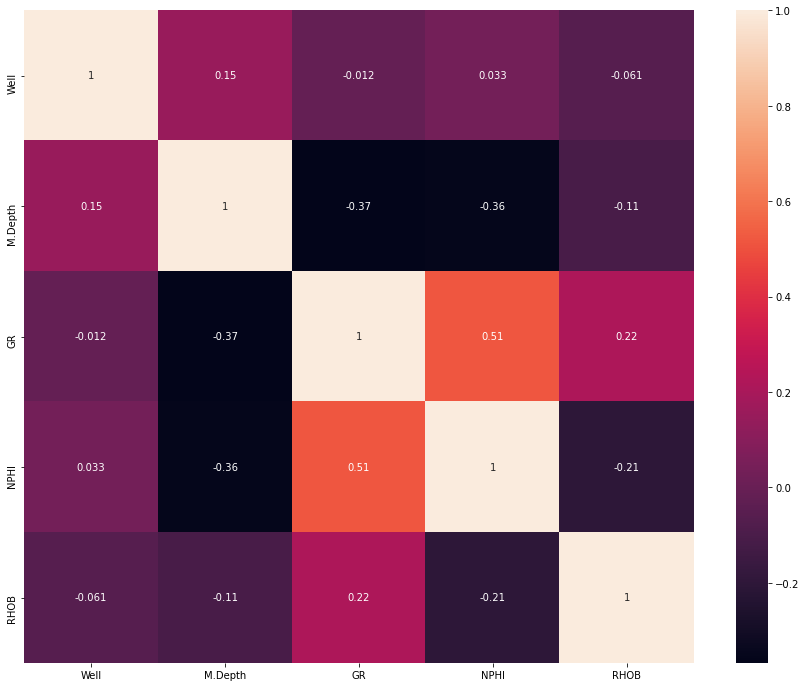

In [ ]:
# the Correlation between the features
plt.figure(figsize = (15,12))
sns.heatmap(data.corr(), annot = True);

- Correlation by descending odre :


In [ ]:
data.corr().unstack(level= 1).sort_values()


GR       M.Depth   -0.367760
M.Depth  GR        -0.367760
NPHI     M.Depth   -0.355606
M.Depth  NPHI      -0.355606
RHOB     NPHI      -0.207472
NPHI     RHOB      -0.207472
RHOB     M.Depth   -0.108488
M.Depth  RHOB      -0.108488
RHOB     Well      -0.060991
Well     RHOB      -0.060991
GR       Well      -0.011840
Well     GR        -0.011840
         NPHI       0.033237
NPHI     Well       0.033237
M.Depth  Well       0.154532
Well     M.Depth    0.154532
GR       RHOB       0.215827
RHOB     GR         0.215827
GR       NPHI       0.513956
NPHI     GR         0.513956
Well     Well       1.000000
GR       GR         1.000000
M.Depth  M.Depth    1.000000
NPHI     NPHI       1.000000
RHOB     RHOB       1.000000
dtype: float64

### Target column Exploration :
In this Dataset **GE_Main** is the most important column that we are aiming to build the model, Exploring it, extract insights from it is highly important to make the model more precise and accurate

In [ ]:
data.GE_Main.value_counts()

CH      8172
DO      5025
LSF     1653
PD      1231
MB      1098
CH.h     952
DF       888
PO       843
IR       789
CSF      659
BM.L     534
BM.H     468
B        372
AB       303
FL       222
ID       213
SS        74
MSF       64
SF        43
CS         7
Name: GE_Main, dtype: int64

- The Results above illustrate that we have CH are more frequent with 8172 folowed by DO as second element with 5025

The Next part we are going to focus more to study each Well alone to get different insights
- The Question is Why I am doing such a kind of visualization ?
  - The main reason is the **imbalaced Data**
  - **Imbalanced data** typically refers to a problem with classification problems where the classes are not represented equally.

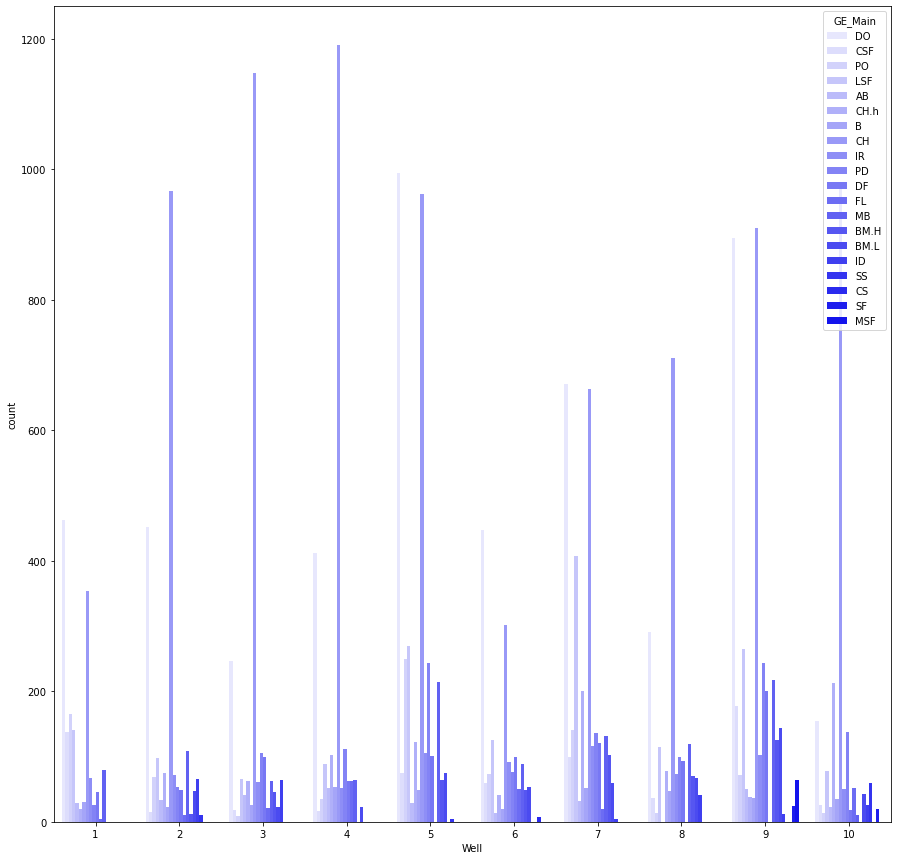

In [ ]:
# Visualization of the componant of each well
plt.figure(figsize=(15,15))
sns.countplot(x="Well",hue = "GE_Main",data=data, saturation=0.85, color="blue");

The countplot above illustrates each `well` versus  the count of each component in  `GE_Main `

In [ ]:
labelencoder = LabelEncoder()
data["GE_Main"] = labelencoder.fit_transform(data["GE_Main"])
######
# Let's add the column GE_Main_cat as the main values with GE_Main with encoded values
data["GE_Main_cat"] = data1["GE_Main"]

In [ ]:
v = data["GE_Main_cat"].unique()
y_encoder = data["GE_Main"].unique()
x = pd.Series(y_encoder,v)

print("GE_Main before and after the Label encoding: \n", x)

GE_Main before and after the Label encoding: 
 DO       9
CSF      7
PO      17
LSF     13
AB       0
CH.h     5
B        1
CH       4
IR      12
PD      16
DF       8
FL      10
MB      14
BM.H     2
BM.L     3
ID      11
SS      19
CS       6
SF      18
MSF     15
dtype: int64


- In machine learning, we usually deal with datasets which contains multiple labels in one or more than one columns. These labels can be in the form of words or numbers. To make the data understandable or in human readable form, the training data is often labeled in words.

- Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form. Machine learning algorithms can then decide in a better way on how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.

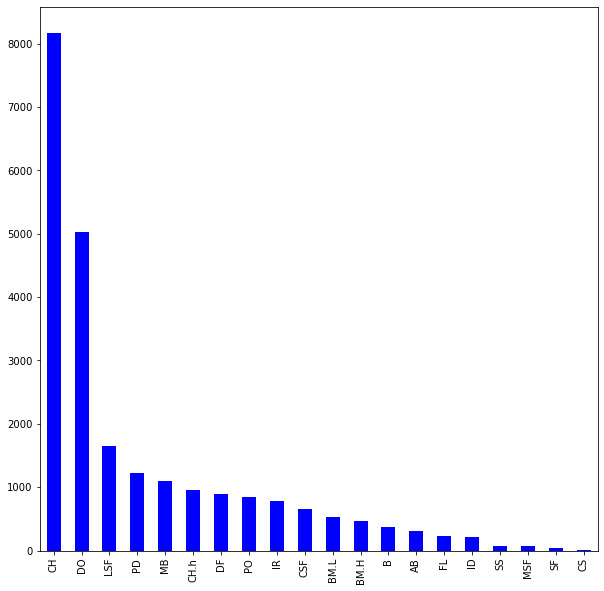

In [ ]:
plt.figure(figsize=(10,10))
data['GE_Main_cat'].value_counts().plot.bar(color= "B" )

In [ ]:
def create_plot(wellname, dataframe, curves_to_plot, depth_curve, log_curves=[], facies_curves=[]):
    # Count the number of tracks we need
    num_tracks = len(curves_to_plot)

    facies_color = ['#F4D03F', '#F5B041','#DC7633','#6E2C00', '#1B4F72','#2E86C1', '#AED6F1', '#A569BD', '#196F3D', 'red','black', 'blue','#40E0D0','#CCCCFF','#DFFF00','green','yellow','#581845','#DAF7A6','#9FE2BF']

    # Setup the figure and axes
    fig, ax = plt.subplots(nrows=1, ncols=num_tracks, figsize=(num_tracks*2, 8))

    # Create a super title for the entire plot
    fig.suptitle(wellname, fontsize=20, y=1.05)

    # Loop through each curve in curves_to_plot and create a track with that data
    for i, curve in enumerate(curves_to_plot):
        if curve in facies_curves:
            cmap_facies = colors.ListedColormap(facies_color[0:dataframe[curve].max()], 'indexed')

            cluster=np.repeat(np.expand_dims(dataframe[curve].values,1), 100, 1)
            im=ax[i].imshow(cluster, interpolation='none', cmap=cmap_facies, aspect='auto',vmin=dataframe[curve].min(),vmax=dataframe[curve].max(),
                            extent=[0,10, depth_curve.max(), depth_curve.min()])

#             for key in lithology_setup.keys():
#                 color = lithology_setup[key]['color']
#                 ax[i].fill_betweenx(depth_curve, 0, dataframe[curve].max(),
#                                   where=(dataframe[curve]==key),
#                                   facecolor=color)
#
        else:
            ax[i].plot(dataframe[curve], depth_curve)


        # Setup a few plot cosmetics
        ax[i].set_title(curve, fontsize=10, fontweight='bold')
        ax[i].grid(which='major', color='lightgrey', linestyle='-')

        # We want to pass in the deepest depth first, so we are displaying the data
        # from shallow to deep
        ax[i].set_ylim(depth_curve.max(), depth_curve.min())
#         ax[i].set_ylim(3500, 3000)

        # Only set the y-label for the first track. Hide it for the rest
        if i == 0:
            ax[i].set_ylabel('DEPTH (m)', fontsize=10, fontweight='bold')
        else:
            plt.setp(ax[i].get_yticklabels(), visible = False)

        # Check to see if we have any logarithmic scaled curves
        if curve in log_curves:
            ax[i].set_xscale('log')
            ax[i].grid(which='minor', color='lightgrey', linestyle='-')



    plt.tight_layout()
    plt.show()

    return cmap_facies

In [ ]:
grouped = data.groupby('Well')

In [ ]:
#grouped.head()

In [ ]:
# Create empty lists
dfs_wells = []
wellnames = []

#Split up the data by well
for well, dat in grouped:
    dfs_wells.append(dat)
    wellnames.append(well)

In [ ]:
# Here we have just created an interval for each Well to be able to create a visualization of our facies
for i, well in enumerate(wellnames):
    print(f'Index: {i} - {well}')

Index: 0 - 1
Index: 1 - 2
Index: 2 - 3
Index: 3 - 4
Index: 4 - 5
Index: 5 - 6
Index: 6 - 7
Index: 7 - 8
Index: 8 - 9
Index: 9 - 10


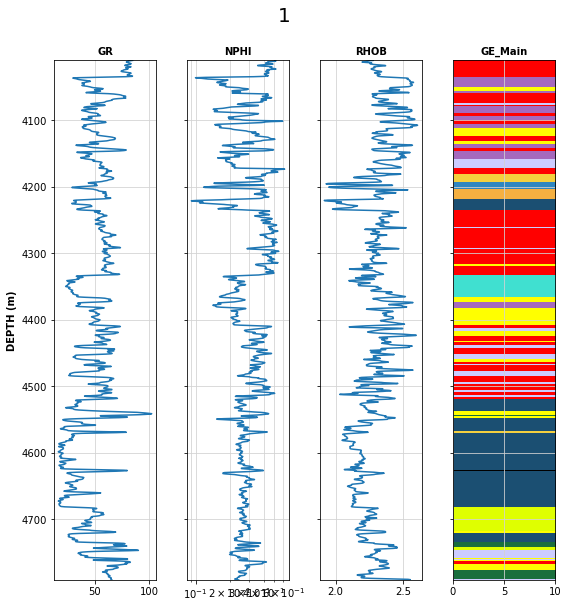

In [ ]:
curves_to_plot = ['GR', 'NPHI', 'RHOB', 'GE_Main']
logarithmic_curves = ['NPHI']
facies_curve=['GE_Main']
well = 0
create_plot(wellnames[well],
            dfs_wells[well],
            curves_to_plot,
            dfs_wells[well]['M.Depth'],
            logarithmic_curves, facies_curve)

The Illustration above illustrates the first `Well`
to Avoid plagiarism: and for further information about the code above for how to visualize Well, check out the [Link](https://https://github.com/andymcdgeo/Unsupervised_Facies_Clustering/blob/main/Unsupervised%20Clustering.ipynb)

## Modeling

*  In this study, we notice that we are facing supervised data since we have the output column which is `"GE_Main"`. We therefore use the supervised learning algorithms

* We are going to focus more in Hyperparameters tuning to get the best results as well as avoiding the overfitting and underfitting problems that the most Machine learning developpers encounter with
* Finally, we will use one of the cross validation methods `(Kfold)` for a possible improvement of our model

### Feature Selection

- There are a lot of tehniques that allows us to select wich features we use, but here we are able to know wich ones are good for the model

In [ ]:
# In this part we split the data train test, but not by using train_test_split(), but by extracting the first Well as a test and all the remaining as a train Data
# Let's create the subset Data with test (well01)

well_test = data.loc[data["Well"] ==1, ]
well_test = well_test.drop("GE_Main_cat", axis = 1)
well_test.head()

,Well,M.Depth,GR,NPHI,RHOB,GE_Main
1,1,4010.0,84.694,0.50674,2.278,9
2,1,4010.5,82.626,0.51526,2.252,9
3,1,4011.0,80.790,0.51195,2.237,9
4,1,4011.5,80.209,0.48551,2.225,9
5,1,4012.0,79.661,0.45111,2.203,9


In [ ]:
well_test.shape

(1563, 6)

In [ ]:
# X: Respresents the features that we want to use to train the model
X= data[1:].drop(columns = ['GE_Main', 'GE_Main_cat','Well'])
# y: Target :predicted Data, The column GE_Main
y = data[1:].drop(columns = ['Well', 'GE_Main_cat','M.Depth','GR','NPHI','RHOB'])

In [ ]:
print("The Train Data:",X)
print("===================================================================")
print("The Target Data:",y)

The Train Data:        M.Depth        GR     NPHI    RHOB
2       4010.5   82.6260  0.51526  2.2520
3       4011.0   80.7900  0.51195  2.2370
4       4011.5   80.2090  0.48551  2.2250
5       4012.0   79.6610  0.45111  2.2030
6       4012.5   78.9710  0.43483  2.1960
7       4013.0   79.7610  0.43998  2.2200
8       4013.5   81.1140  0.43073  2.2550
9       4014.0   81.8930  0.41756  2.2670
10      4014.5   82.8580  0.43789  2.2590
11      4015.0   83.3710  0.47782  2.2550
12      4015.5   82.7480  0.48494  2.2630
13      4016.0   81.2250  0.45212  2.2780
14      4016.5   79.4980  0.41001  2.3010
15      4017.0   78.0320  0.37316  2.3340
16      4017.5   77.4350  0.35454  2.3660
17      4018.0   78.1190  0.35632  2.3700
18      4018.5   79.8190  0.38619  2.3430
19      4019.0   81.7750  0.43801  2.3080
20      4019.5   83.2030  0.47382  2.2850
21      4020.0   82.9480  0.46668  2.2830
22      4020.5   80.4730  0.45721  2.2890
23      4021.0   78.3360  0.46832  2.2900
24      4021.5   7

### Scaling
Scikit includes a preprocessing module that can '`standardize`' the data (giving each variable zero mean and unit variance, also called whitening). Many machine learning algorithms assume features will be standard normally distributed data (ie: Gaussian with zero mean and unit variance). The factors used to standardize the training set must be applied to any subsequent feature set that will be input to the classifier. The StandardScalar class can be fit to the training set, and later used to standardize any training data.



When we use Standardscaler and when we use normalizer ?

`StandardScaler` : It transforms the data in such a manner that it has mean as 0 and standard deviation as 1. In short, it standardizes the data. Standardization is useful for data which has negative values. It arranges the data in a standard normal distribution. It is more useful in classification than regression.

`Normalizer` : It squeezes the data between 0 and 1. It performs normalization. Due to the decreased range and magnitude, the gradients in the training process do not explode and you do not get higher values of loss. Is more useful in regression than classification.

In [ ]:
#Standardizing
scaler = preprocessing.StandardScaler().fit(X)
scaled_features = scaler.transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, y, test_size = 0.3, random_state = 100)

## Logistic Regression

In [ ]:
model_reg = LogisticRegression()
clf = model_reg.fit(X_train,y_train)
prediction_lr=model_reg.predict(X_test)
pred_train= model_reg.predict(X_train)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Logistic Regression is',round(accuracy_score(prediction_lr,y_test)*100,2))

kfold = KFold(n_splits=10, random_state=22,shuffle=True) # k=10, split the data into 10 equal parts
result_lr=cross_val_score(model_reg,X,y,cv=10,scoring='accuracy')
print('The cross validated score for Logistic Regression is:',round(result_lr.mean()*100,2))
#y_pred = cross_val_predict(model_reg,X,y,cv=10)
# sns.heatmap(confusion_matrix(y,y_pred),annot=True,fmt='3.0f',cmap="summer")
# plt.title('Confusion_matrix', y=1.05, size=15)
#######################


--------------The Accuracy of the model----------------------------
The accuracy of the Logistic Regression is 61.23
The cross validated score for Logistic Regression is: 53.7


Interpretation of the results above :
a) when you test a model over the same data you used to create the model, We have overfitting
b) when We use cross-validation, you expect to have less overfitting but also a more realistic proxy for the accuracy.

My advice is not to think of the `62.09%` as the benchmark for the accuracy of our models, as the number reflects overfitting. K-fold cross validation is not decreasing our accuracy, it is rather giving us a better approximation for that accuracy, including less overfitting. In other words, the accuracy of our models is (approximately) `53.73%`.

If We want to improve the accuracy, think of improving accuracy computing with k-fold cross validation. There are several ways to try to improve, for example:

* a) get more data/better data
* b) try other classifiers - svm, random forest, etc
* c) try which combinations of features seems to work best
* d) generate better features

In [ ]:

## Overfitting and underfitting with logistic regression
print("accuracy for test:",accuracy_score(y_test,prediction_lr))
print("accuracy for train:",accuracy_score(y_train,pred_train))


accuracy for test: 0.6123111675843569
accuracy for train: 0.6119448142321191


Here We can say that the accuracies aren't overfitted because the result of train and test are approximately equal, and which make it confusing to choose, in this situation lets apply GriSearch hyperparameter tuning to avoid any doubt
- 0.62 for the test
- 0.61 for the train
0.62 and 0.61 aren't a high accuracy as we need
#### Learning Curve :
A learning curve is a plot of model learning performance over experience or time.

Learning curves are a widely used diagnostic tool in machine learning for algorithms that learn from a training dataset incrementally. The model can be evaluated on the training dataset and on a hold out validation dataset after each update during training and plots of the measured performance can created to show learning curves. [Read More](https://https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/#:~:text=A%20learning%20curve%20is%20a,from%20a%20training%20dataset%20incrementally.&text=Learning%20curves%20are%20plots%20that,time%20in%20terms%20of%20experience.)

### GridSearch with Logistic Regression

In [ ]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg_cv=GridSearchCV(model_reg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print("tuned hyperparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)


tuned hyperparameters :(best parameters)  {'C': 1.0, 'penalty': 'l2'}
accuracy : 0.6118243812336217


### **RECAP**:
`LogisticRegression` is not the best choice for our case

### Random Forest

In [ ]:
model_RF = RandomForestClassifier(criterion='gini', n_estimators=700,
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto',oob_score=True,
                             random_state=1,n_jobs=-1)
model_RF.fit(X_train,y_train)
prediction_rm=model_RF.predict(X_test)
pred_train_rm= model_RF.predict(X_train)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Random Forest Classifier is',round(accuracy_score(prediction_rm,y_test)*100,2))
kfold = KFold(n_splits=10, random_state=22,shuffle = True) # k=10, split the data into 10 equal parts
result_rm=cross_val_score(model_RF,X,y,cv=10,scoring='accuracy')
print('The cross validated score for Random Forest Classifier is:',round(result_rm.mean()*100,2))
#y_pred = cross_val_predict(model_RF,X,y,cv=10)
# sns.heatmap(confusion_matrix(y,y_pred),annot=True,fmt='3.0f',cmap="summer")
# plt.title('Confusion_matrix', y=1.05, size=15)


--------------The Accuracy of the model----------------------------
The accuracy of the Random Forest Classifier is 83.62
The cross validated score for Random Forest Classifier is: 59.7


In [ ]:

## Overfitting and underfitting with Random Forest
print("accuracy for test:",accuracy_score(y_test,prediction_rm))
print("accuracy for train:",accuracy_score(y_train,pred_train_rm))


accuracy for test: 0.8362275871805732
accuracy for train: 0.9566138206462544


#### GridSearch with RandomForest

In [ ]:

# Parameters
param_grid = {
    'n_estimators': [200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=model_RF, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

CV_rfc.best_params_


{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 300}

In [ ]:
print("The accuracy of RandomForest is :",CV_rfc.best_score_)

The accuracy of RandomForest is : 0.7396224166760478


### Support Victor Machine SVM

In [ ]:
model_SVC = SVC()
model_SVC.fit(X_train,y_train)
prediction_svm=model_SVC.predict(X_test)
pred_train_svm= model_SVC.predict(X_train)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Support Vector Machines Classifier is',round(accuracy_score(prediction_svm,y_test)*100,2))
kfold = KFold(n_splits=10, random_state=22,shuffle = True) # k=10, split the data into 10 equal parts
result_svm=cross_val_score(model_SVC,X,y,cv=10,scoring='accuracy')
print('The cross validated score for Support Vector Machines Classifier is:',round(result_svm.mean()*100,2))
#y_pred = cross_val_predict(model_SVC,X,y,cv=10)
##sns.heatmap(confusion_matrix(y,y_pred),annot=True,fmt='3.0f',cmap="summer")......
##plt.title('Confusion_matrix', y=1.05, size=15)


--------------The Accuracy of the model----------------------------
The accuracy of the Support Vector Machines Classifier is 67.43
The cross validated score for Support Vector Machines Classifier is: 49.35


#### GridSearch with Support Vector Machine


In [ ]:

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = False, verbose = 0)

# fitting the model for grid search
grid.fit(X_train, y_train)

# print best parameter after tuning
#print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
#print(grid.best_estimator_)


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=False, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print("The best accuracy of SVC: ", grid.best_score_)

The best accuracy of SVC:  0.7856710350135865


### KNN:

In [ ]:
model_KNN = KNeighborsClassifier(n_neighbors = 4)
model_KNN.fit(X_train,y_train)
prediction_knn=model_KNN.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the K Nearst Neighbors Classifier is',round(accuracy_score(prediction_knn,y_test)*100,2))
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
result_knn=cross_val_score(model_KNN,X,y,cv=10,scoring='accuracy')
print('The cross validated score for K Nearest Neighbors Classifier is:',round(result_knn.mean()*100,2))
#y_pred = cross_val_predict(model_KNN,X,y,cv=10)
#sns.heatmap(confusion_matrix(y,y_pred),annot=True,fmt='3.0f',cmap="summer")
#plt.title('Confusion_matrix', y=1.05, size=15)


--------------The Accuracy of the model----------------------------
The accuracy of the K Nearst Neighbors Classifier is 78.26
The cross validated score for K Nearest Neighbors Classifier is: 44.93


#### GridSearch with K_neighrest Neighbors

In [ ]:

grid_params = {
     'n_neighbors':[3,5,11,19],
     'weights' : ['uniform', 'distance'],
     'metric'  : ['euclidean', 'manhattan']}

gs = GridSearchCV(
      KNeighborsClassifier(),
      grid_params,
      verbose = 1,
      cv = 3,
      n_jobs = -1)

gs_results = gs.fit(X_train, y_train)
gs_results.best_score_
gs_results.best_estimator_
gs_results.best_params_


Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    5.2s finished


{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}

In [ ]:
print("The accuracy of KNN is :" ,gs_results.best_score_)

The accuracy of KNN is : 0.7994674127357188


###XGBOOST algorithm

In [ ]:
#Using the XGBoost Classifier. I have used just a few combinations here and there without GridSearch or RandomSearch
# because the dataset was pretty small
xg_cl = xgb.XGBClassifier(objective='multi:softprob', n_estimators=200,seed=123,learning_rate=0.15,max_depth=5,colsample_bytree=1,subsample=1)


In [ ]:
eval_set = [(X_test, y_test)]

clf = xg_cl.fit(X_train,
              y_train,
              eval_set=eval_set,
              early_stopping_rounds=11,
              verbose=False)


In [ ]:
# Predicted values using XGBOOST
preds = xg_cl.predict(X_test)
preds_train = xg_cl.predict(X_train)

In [ ]:
## Overfitting and underfitting with XGBOOST
print("accuracy for test:",accuracy_score(y_test,preds))
print("accuracy for train:",accuracy_score(y_train,preds_train))

accuracy for test: 0.8571226881265
accuracy for train: 0.9729517124531042


## The results above indicates that the model is overffited
- Let's tune the hyperparameters to obtain the the best accuracy results

In [ ]:
param_test = {
    'reg_alpha':[1e-5, 1e-2, 0.1, 100],
    'objective':['multi:softprob','multi:softmax']
}
gsearch = GridSearchCV(estimator =
xgb.XGBClassifier(learning_rate =0.1,
              n_estimators=10,
              max_depth=5,
              min_child_weight=2,
              gamma=1,
              subsample=0.85,
              colsample_bytree=0.8,
              nthread=4,
              scale_pos_weight=1,
              seed=27),
              param_grid = param_test,
              n_jobs=4,
              iid=True,
              cv=10,
              verbose=10)

gsearch.fit(X_train,y_train)

#print('Best Grid Search Parameters :',gsearch.best_params_)
print('Best Grid Search Score : ',gsearch.best_score_)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    4.8s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    6.5s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    9.7s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   11.6s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   15.3s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   18.1s
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:   22.7s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   26.4s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:   31.9s finished


Best Grid Search Score :  0.7167493646375408


- Tuning the parameters above gives us an accuracy of `0.716` as a high accuracy

In [ ]:
# In this part we split the data train test, but not by using train_test_split(), but by extracting the first Well as a test and all the remaining as a train Data
# Let's create the subset Data with test (well01)

well_1= data.loc[data["Well"] ==1, ]
well_t1= well_1.drop(columns=["GE_Main_cat","Well"], axis = 1)
well_t1

,M.Depth,GR,NPHI,RHOB,GE_Main
1,4010.0,84.694,0.50674,2.278,9
2,4010.5,82.626,0.51526,2.252,9
3,4011.0,80.790,0.51195,2.237,9
4,4011.5,80.209,0.48551,2.225,9
5,4012.0,79.661,0.45111,2.203,9
6,4012.5,78.971,0.43483,2.196,9
7,4013.0,79.761,0.43998,2.220,9
8,4013.5,81.114,0.43073,2.255,9
9,4014.0,81.893,0.41756,2.267,9
10,4014.5,82.858,0.43789,2.259,9


In [ ]:
y_w = well_t1["GE_Main"]
X_w = well_t1.drop("GE_Main", axis = 1)

## Standardizing well_01 tp test

In [ ]:
#Standardizing
scaler_w1 = preprocessing.StandardScaler().fit(X_w)
scaled_features_w1 = scaler_w1.transform(X_w)

In [ ]:
#scaled_features_w1

In [ ]:
pred_w1 = xg_cl.predict(scaled_features_w1)

In [ ]:
print("XGBOOST Accuracy score for the well_1:", accuracy_score(y_w, pred_w1))

XGBOOST Accuracy score for the well_1: 0.5303902751119641


In [ ]:
print(classification_report(y_w,pred_w1))

              precision    recall  f1-score   support

           0       0.11      0.07      0.09        29
           1       0.19      0.23      0.21        31
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.74      0.94      0.83       354
           5       0.00      0.00      0.00        20
           7       0.72      0.69      0.70       137
           8       0.16      0.30      0.21        46
           9       0.82      0.65      0.73       463
          10       0.00      0.00      0.00         5
          11       0.00      0.00      0.00         0
          12       0.59      0.24      0.34        67
          13       0.14      0.10      0.12       141
          14       0.48      0.39      0.43        80
          16       0.12      0.64      0.20        25
          17       0.03      0.01      0.01       165

    accuracy                           0.53      1563
   macro avg       0.26   

In [ ]:
Accuracy_comparison = {
    'Model type' : ['LogR', 'RaForest', 'SVM',"KNN","XGBOOST"],
    'Test_acc' : [accuracy_score(y_test,prediction_lr), accuracy_score(y_test,prediction_rm), round(accuracy_score(prediction_svm,y_test)*100,2),"/",accuracy_score(y_test,preds)],

    'Train_acc' : [accuracy_score(y_train,pred_train), accuracy_score(y_train,pred_train_rm), round(result_svm.mean()*100,2),round(accuracy_score(prediction_knn,y_test)*100,2),accuracy_score(y_train,preds_train)]

    ,'cv_acc' : [logreg_cv.best_score_, CV_rfc.best_score_ , grid.best_score_,gs_results.best_score_,gsearch.best_score_]
}

dfobj = pd.DataFrame(Accuracy_comparison)

dfobj

,Model type,Test_acc,Train_acc,cv_acc
0,LogR,0.612311,0.611945,0.611824
1,RaForest,0.836228,0.956614,0.739622
2,SVM,67.43,49.350000,0.785671
3,KNN,/,78.260000,0.799467
4,XGBOOST,0.857123,0.972952,0.716749


# F1 Score :
In many cases we need need to use `F1 Score` instead of the `accuracy` to compare between `F1 score` and `Accuracy` :

- To summarise the differences between the `F1 score` and the `accuracy`,
`Accuracy` is used when the True Positives and True negatives are more important while `F1 score` is used when the False Negatives and False Positives are crucial

- Accuracy can be used when the class distribution is similar while F1-score is a better metric when there are `imbalanced` classes as in the above case.
- In most real-life classification problems, `imbalanced` class distribution exists and thus F1 score is a better metric to evaluate our model on.

-  `F1 score` is considered perfect when it's `1` , while the model is a total failure when it's `0` .

## Predicted facies visualization

In [ ]:

facies_color = ['#F4D03F', '#F5B041','#DC7633','#6E2C00', '#1B4F72','#2E86C1', '#AED6F1', '#A569BD', '#196F3D', 'red','black', 'blue','#40E0D0','#CCCCFF','#DFFF00','green','yellow','#581845','#DAF7A6','#9FE2BF']
pred_w1 = xg_cl.predict(scaled_features_w1)
well_t1['XGB_Pred'] = pred_w1
def compare_facies_plot(logs, compadre, facies_colors= []):

    #make sure logs are sorted by depth
    logs = logs.sort_values(by='M.Depth')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')

    ztop=logs["M.Depth"].min(); zbot=logs["M.Depth"].max()

    cluster1 = np.repeat(np.expand_dims(logs['GE_Main'].values,1), 100, 1)
    cluster2 = np.repeat(np.expand_dims(logs[compadre].values,1), 100, 1)

    f, ax = plt.subplots(nrows=1, ncols=5, figsize=(14, 11))
    ax[0].plot(logs.GR, logs["M.Depth"], '-g')
    ax[1].plot(logs.NPHI, logs["M.Depth"], '-')
    ax[2].plot(logs.RHOB, logs["M.Depth"], '-', color='0.5')
    im1 = ax[3].imshow(cluster1, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)
    im2 = ax[4].imshow(cluster2, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)

    divider = make_axes_locatable(ax[4])
    cax = divider.append_axes("right", size="10%", pad=0.05)
    cbar=plt.colorbar(im2, cax=cax)
    cbar.set_label((4*' ').join(['Do', 'CSF', 'PO',
                                'LSF', ' AB ', ' CH.h ', ' B  ',
                                ' CH ', ' IR ','PD','DF','FL','MB','BM.H','BM.L','ID',
                                 'SS','CS','SF','MSF']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')

    for i in range(len(ax)-2):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)

    ax[0].set_xlabel("GR")
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[1].set_xlabel("NPHI")
    ax[1].set_xlim(logs.NPHI.min(),logs.NPHI.max())
    ax[2].set_xlabel("RHOB")
    ax[2].set_xlim(logs.RHOB.min(),logs.RHOB.max())
    ax[3].set_xlabel('Actual well')
    ax[4].set_xlabel(compadre)

    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([])

    f.suptitle('Well_1', fontsize=14,y=0.94)



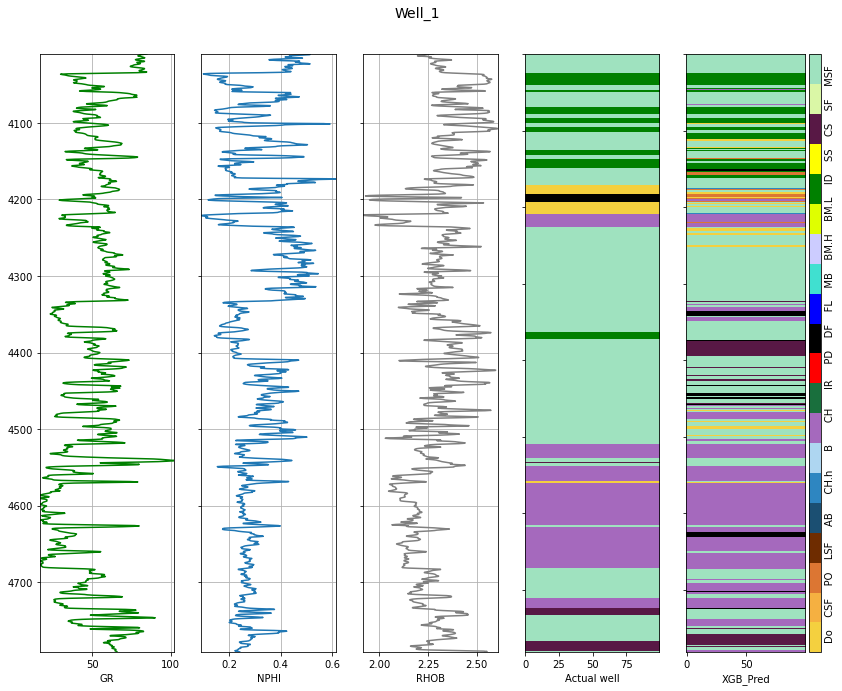

In [ ]:
#let's plot KNN result
compare_facies_plot(well_t1, "XGB_Pred", facies_color)
#plt.savefig("KNN.png", dpi=400)

## Well_01 prediction with all the models used

In [ ]:
# XGBOOST
pred_w1 = xg_cl.predict(scaled_features_w1)
well_t1['XGB_Pred'] = pred_w1

# LnearRegression
pred_w_Lg = model_reg.predict(scaled_features_w1)
well_t1['LR_Pred'] = pred_w_Lg

# RandomForest
pred_w_RF = model_RF.predict(scaled_features_w1)
well_t1['RF_Pred'] = pred_w_RF

# SVC
pred_w_SVC = model_SVC.predict(scaled_features_w1)
well_t1['SVC_Pred'] = pred_w_SVC

# KNN
pred_w_KNN = model_KNN.predict(scaled_features_w1)
well_t1['KNN_Pred'] = pred_w_KNN

In [ ]:
facies_colors = ['#F4D03F', '#F5B041','#DC7633','#6E2C00', '#1B4F72','#2E86C1', '#00FFFF', '#A569BD', '#196F3D', 'red','black', 'blue','#40E0D0','#CCCCFF','#DFFF00','green','#FF00FF','#581845','#DAF7A6','#9FE2BF']

def compare_all_facies(logs, Pred1, Pred2, Pred3, Pred4, Pred5, facies_colors):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='M.Depth')
    cmap_facies = colors.ListedColormap(facies_colors[0:len(facies_colors)], 'indexed')
    ztop=logs["M.Depth"].min(); zbot=logs['M.Depth'].max()

    cluster1 = np.repeat(np.expand_dims(logs['GE_Main'].values,1), 100, 1)
    cluster2 = np.repeat(np.expand_dims(logs[Pred1].values,1), 100, 1)
    cluster3 = np.repeat(np.expand_dims(logs[Pred2].values,1), 100, 1)
    cluster4 = np.repeat(np.expand_dims(logs[Pred3].values,1), 100, 1)
    cluster5 = np.repeat(np.expand_dims(logs[Pred4].values,1), 100, 1)
    cluster6 = np.repeat(np.expand_dims(logs[Pred5].values,1), 100, 1)


    f, ax = plt.subplots(nrows=1, ncols=6, figsize=(14, 11))

    im1 = ax[0].imshow(cluster1, interpolation='none', aspect='auto',
                       cmap=cmap_facies,vmin=1,vmax=9)
    im2 = ax[1].imshow(cluster2, interpolation='none', aspect='auto',
                       cmap=cmap_facies,vmin=1,vmax=9)
    im3 = ax[2].imshow(cluster3, interpolation='none', aspect='auto',
                       cmap=cmap_facies,vmin=1,vmax=9)
    im4 = ax[3].imshow(cluster4, interpolation='none', aspect='auto',
                       cmap=cmap_facies,vmin=1,vmax=9)
    im5 = ax[4].imshow(cluster5, interpolation='none', aspect='auto',
                       cmap=cmap_facies,vmin=1,vmax=9)
    im6 = ax[5].imshow(cluster6, interpolation='none', aspect='auto',
                       cmap=cmap_facies,vmin=1,vmax=9)



    divider = make_axes_locatable(ax[5])
    cax = divider.append_axes("right", size="10%", pad=0.05)
    cbar=plt.colorbar(im2, cax=cax)
    cbar.set_label((4*' ').join(['Do', 'CSF', 'PO',
                                'LSF', ' AB ', ' CH.h ', ' B  ',
                                ' CH ', ' IR ','PD','DF','FL','MB','BM.H','BM.L','ID',
                                 'SS','CS','SF','MSF']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')

    for i in range(len(ax)-6):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=4)

    ax[0].set_xlabel('Facies'); ax[1].set_xlabel(Pred1); ax[2].set_xlabel(Pred2)
    ax[3].set_xlabel(Pred3); ax[4].set_xlabel(Pred4); ax[5].set_xlabel(Pred5)


    #ax[0].set_yticklabels([]) ;
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([])


    ax[0].set_xticklabels([]); ax[1].set_xticklabels([]); ax[2].set_xticklabels([])
    ax[3].set_xticklabels([]); ax[4].set_xticklabels([]); ax[5].set_xticklabels([])


    f.suptitle('Various prediction models with well_1', fontsize=14,y=0.94)

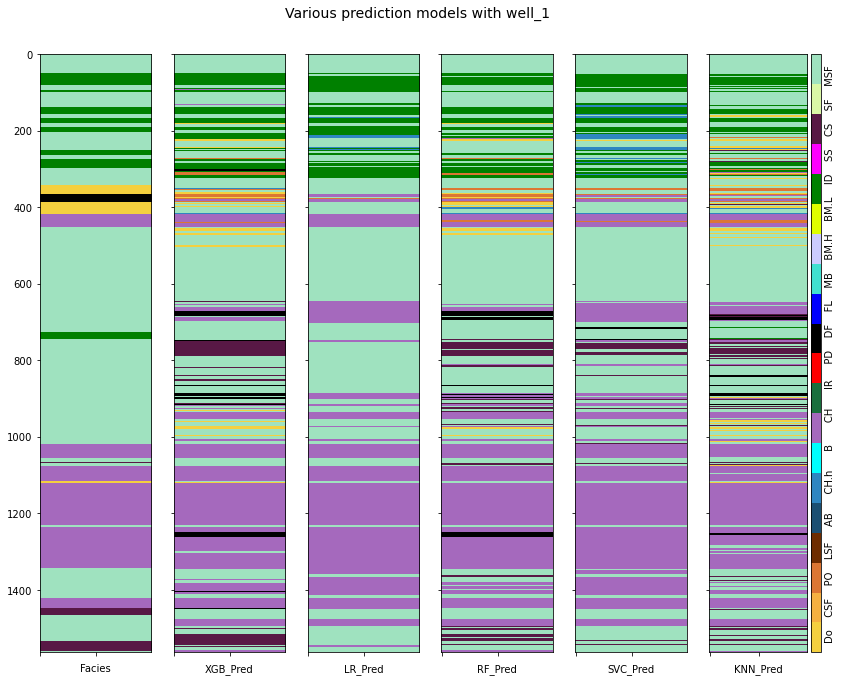

In [ ]:
compare_all_facies(well_t1,'XGB_Pred','LR_Pred','RF_Pred', 'SVC_Pred', 'KNN_Pred', facies_colors)
#plt.savefig("Compo.png", dpi=400)

## Adding the Well 11

In [ ]:
# Adding the Well 11
test_well_11 = pd.read_excel(r"C:\Users\dell\Downloads\i9999_logs_export_test.xlsm")
test_well_11.head()

,Well,M.Depth,GR,NPHI,RHOB,RT
0,11,3865.5,87.3321,0.36162,2.1663,0.9319
1,11,3866.0,88.2989,0.38980,2.1605,0.8686
2,11,3866.5,89.4731,0.44508,2.2424,1.0376
3,11,3867.0,84.4193,0.46536,2.2696,1.2239
4,11,3867.5,83.0291,0.45216,2.2663,1.1861


##### HINT:
The Accuracy of RandomForest and XGBOOST are approximately the same in train and test


In [ ]:
test_well_11["Well"] = test_well_11["Well"].astype(int)
test_well_11["M.Depth"] = test_well_11["M.Depth"].astype(float)
test_well_11["GR"] = test_well_11.GR.astype(float)
test_well_11["NPHI"] = test_well_11.NPHI.astype(float)
test_well_11["RHOB"] = test_well_11.RHOB.astype(float)
data1 = test_well_11.copy()

In [ ]:
test_well_11.drop("RT",axis = 1,inplace = True)

In [ ]:
test_well_11.drop("Well",axis = 1,inplace = True)

In [ ]:
test_well_11.head()

,M.Depth,GR,NPHI,RHOB
0,3865.5,87.3321,0.36162,2.1663
1,3866.0,88.2989,0.38980,2.1605
2,3866.5,89.4731,0.44508,2.2424
3,3867.0,84.4193,0.46536,2.2696
4,3867.5,83.0291,0.45216,2.2663


In [ ]:
#Standardizing
scaler = preprocessing.StandardScaler().fit(test_well_11)
scaled_well = scaler.transform(test_well_11)

In [ ]:
pred_w11 = xg_cl.predict(scaled_well)

In [ ]:
pred_w11

array([9, 9, 9, ..., 4, 4, 4])

In [ ]:
prediction = pd.Series(test_well_11["M.Depth"],pred_w11)
prediction

9    3870.0
9    3870.0
9    3870.0
9    3870.0
9    3870.0
9    3870.0
9    3870.0
9    3870.0
9    3870.0
9    3870.0
9    3870.0
9    3870.0
9    3870.0
9    3870.0
9    3870.0
9    3870.0
9    3870.0
9    3870.0
9    3870.0
9    3870.0
9    3870.0
9    3870.0
9    3870.0
9    3870.0
9    3870.0
9    3870.0
9    3870.0
9    3870.0
9    3870.0
9    3870.0
      ...  
4    3867.5
4    3867.5
4    3867.5
4    3867.5
4    3867.5
4    3867.5
4    3867.5
4    3867.5
4    3867.5
4    3867.5
4    3867.5
4    3867.5
4    3867.5
4    3867.5
4    3867.5
4    3867.5
4    3867.5
4    3867.5
4    3867.5
4    3867.5
4    3867.5
4    3867.5
4    3867.5
4    3867.5
4    3867.5
4    3867.5
4    3867.5
4    3867.5
4    3867.5
4    3867.5
Name: M.Depth, Length: 1954, dtype: float64

- one of techniques that we usually use
 - `Early Stopping`
 - Changing the `test size `

#### Notes in my consideration:
My model needs be improved (change parameters)
- I may need to try a different machine learning algorithm (not all algorithms created equal)
- I need more data (subtle relationship difficult to find)
- I may need to try transforming my data (dependent upon algorithm used)
There may be no relationship between the dependent and independent variables

- **The fact of the matter is**, a lower testing metric (e.g. accuracy) than your training is indicative of overfitting your model not something you want when trying to create a new predictive model.

In [ ]:
!pip install cegaltools
from cegaltools.plotting import CegalWellPlotter as cwp






In [ ]:
from snowballstemmer import stemmer
ar_stemmer = stemmer("arabic")
ar_stemmer.stemWord(u"فسميتموها")

'سمي'